In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../learnMSA')
from learnMSA import msa_hmm
import seaborn as sns

In [8]:
def check_fam(family, 
                 dataset="homfam", 
                 bins=100,
                 q=0.75):
    fasta_file = msa_hmm.fasta.Fasta("data/"+dataset+"/train/"+family+".fasta")
    ref_fasta_file = msa_hmm.fasta.Fasta("data/"+dataset+"/refs/"+family+".ref")
    x = fasta_file.seq_lens
    print(np.amax(fasta_file.seq_lens))
    plt.hist(x, density=False, bins=bins);  
    plt.xlabel("Seq. length")
    plt.ylabel("Number of seq.")
    median, q25, q75= np.percentile(x, 50), np.percentile(x, 25), np.percentile(x, 75)
    plt.axvline(x = median, color = 'r', label = "median")
    plt.axvline(x = q25, color = 'r', label = "q25")
    plt.axvline(x = q75, color = 'r', label = "q75")
    for sid, length in zip(ref_fasta_file.seq_ids, ref_fasta_file.seq_lens):
        plt.axvline(x = length, color = 'g', label = sid)

In [49]:
def plot_sequence_length_distribution(fasta_filename, 
                                     bins=100,
                                     q=0.75):
    fasta_file = msa_hmm.fasta.Fasta(fasta_filename)
    x = fasta_file.seq_lens
    sns.histplot(x, bins=bins)
    #plt.hist(x, density=False, bins=bins);  
    plt.xlabel("Seq. length")
    plt.ylabel("Number of seq.")
    median, q25, q75= np.percentile(x, 50), np.percentile(x, 25), np.percentile(x, 75)
    plt.axvline(x = q25, c='k', ls='--', label = "q25")
    plt.axvline(x = median, c='orange', ls='-', label = "median")
    plt.axvline(x = q75, c='g', ls='--', label = "q75")
    plt.legend(loc='upper right')

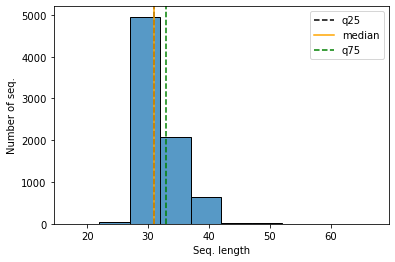

In [50]:
plot_sequence_length_distribution("data/homfam/train/egf.fasta", bins=10)